In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

## Unit 3 딥러닝 기초 수학

Text(0, 0.5, '$J(\\theta_1)$')

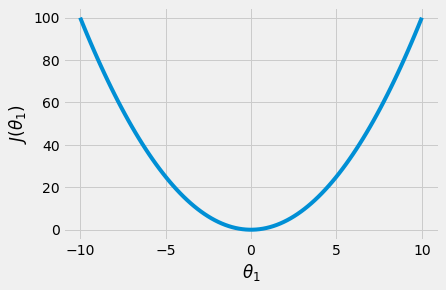

In [23]:
import numpy as np

x = np.linspace(-10, 10, 100)
y = x ** 2

plt.figure()
plt.plot(x, y)
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')

In [105]:
import tensorflow as tf

x = tf.ones(shape=(2, 1))
print(x)

x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [106]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[-0.6448786 ]
 [-0.8952123 ]
 [ 0.26810464]], shape=(3, 1), dtype=float32)


In [107]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.5090333 ]
 [0.44601667]
 [0.39412355]], shape=(3, 1), dtype=float32)


In [108]:
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [109]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.2899868 ],
       [-0.18472943],
       [ 1.1037753 ]], dtype=float32)>


In [111]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [112]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [113]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [114]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

## Unit 4 딥러닝 개발 환경 - Keras

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class SimpleDense(Layer):
    
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), 
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,), 
                                 initializer='zeros')
        
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, softmax


model = Sequential([
    InputLayer(input_shape=(64,)),
    SimpleDense(64, activation=relu),
    SimpleDense(1, activation=softmax)
])
model.compile(loss='categorical_crossentropy', 
              optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_dense (SimpleDense)   (None, 64)                4160      
_________________________________________________________________
simple_dense_1 (SimpleDense) (None, 1)                 65        
Total params: 4,225
Trainable params: 4,225
Non-trainable params: 0
_________________________________________________________________


## Unit 5 신경망 모델

In [2]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.utils import plot_model

In [3]:
model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(1, activation='relu')
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


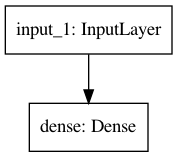

In [4]:
plot_model(model)

In [5]:
model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(2, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


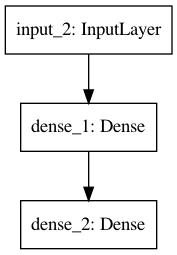

In [6]:
plot_model(model)

In [7]:
from tensorflow.keras.layers import Dropout

model = Sequential([
    InputLayer(input_shape=(2,)), 
    Dense(2, activation='relu'),
    Dropout(.5),
    Dense(2, activation='relu'),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dropout (Dropout)            (None, 2)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


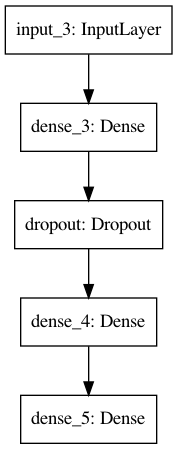

In [8]:
plot_model(model)

In [93]:
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense

In [94]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) [7 2 1 ... 4 5 6]


In [95]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [96]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

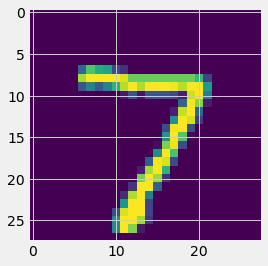

In [97]:
plt.imshow(test_images[0])

In [98]:
X = train_images.reshape((60000, 28 * 28)).astype("float32") / 255 
X_tst = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
print(X.shape, train_labels.shape, X_tst.shape, test_labels.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


In [99]:
model = Sequential([
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
model.fit(X, train_labels, epochs=3, batch_size=128)
model.summary()

Epoch 1/3
469/469 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9259
Epoch 2/3
469/469 [==============================] - 1s 3ms/step - loss: 0.1048 - accuracy: 0.9688
Epoch 3/3
469/469 [==============================] - 1s 3ms/step - loss: 0.0690 - accuracy: 0.9794
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [101]:
p = model.predict(X_tst)
print(p[0])

[1.2307868e-08 5.3361421e-10 4.1219532e-06 8.7345055e-05 6.2382571e-11
 1.6594444e-06 3.5706971e-12 9.9990547e-01 7.9382784e-07 4.7194584e-07]


Text(0, 0.5, 'Probability Score')

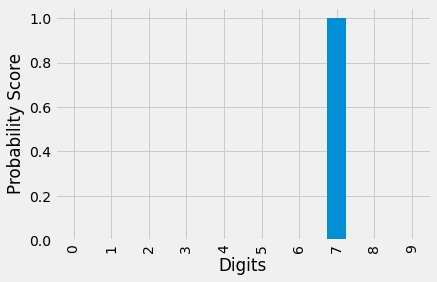

In [103]:
ax = pd.Series(p[0]).plot.bar()
ax.set_xlabel('Digits')
ax.set_ylabel('Probability Score')

In [102]:
test_loss, test_acc = model.evaluate(X_tst, test_labels)
print(f"test_acc: {test_acc:.4f}")

313/313 [==============================] - 0s 651us/step - loss: 0.0754 - accuracy: 0.9762
test_acc: 0.9762


## Unit 7 역전파 학습

In [25]:
import tensorflow as tf

x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
    
grad_of_y_wrt_x = tape.gradient(y, x)

In [104]:
grad_of_y_wrt_x.numpy()

2.0

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.loass.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [ ]:
def fit(model, images, labels, epochs, batch_size=128): 
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(len(images) // batch_size):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch) 
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

## Unit 8 초기화 및 표준화

In [118]:
from tensorflow.keras.layers import (Activation, BatchNormalization, 
                                     Dense, Input)

inputs = Input(shape=(128, ))
x = Dense(64, use_bias=False)(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)